# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [26]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [27]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [78]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [79]:
def get_metrics(y_true, y_pred):
    
    result = {
        'precision_score' : precision_score(y_true, y_pred) ,
        'recall_score': recall_score(y_true, y_pred),
        'f1_score' : f1_score(y_true, y_pred),
        'accuracy_score': accuracy_score(y_true, y_pred)
    }
    
    return result

In [80]:
model = make_pipeline(StandardScaler(),SGDClassifier(random_state=0))

In [81]:
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [82]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [83]:
cm = confusion_matrix(y_test, y_pred , [0 , 1])

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [85]:
res_metrics = get_metrics(y_test, y_pred)

In [86]:
res_metrics

{'precision_score': 0.6451612903225806,
 'recall_score': 0.3448275862068966,
 'f1_score': 0.44943820224719105,
 'accuracy_score': 0.8679245283018868}

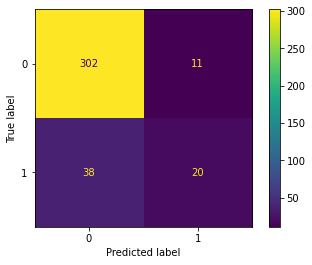

In [88]:
plot_confusion_matrix(model, X_test, y_test)  

In [90]:
y_pred.sum()

31

In [93]:
y_test.sum()

58

In [95]:
len(y_test) - y_test.sum()

313

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.pipeline import Pipeline

In [141]:
param_dist = {
    'sgdc__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge','perceptron'],
    'sgdc__alpha': [0.1,0.01,0.001,0.0001],
    'sgdc__penalty' : ['l2' , 'l1' , 'elasticnet']
}

In [142]:
param_dist

{'sgdc__loss': ['hinge',
  'log',
  'modified_huber',
  'squared_hinge',
  'perceptron'],
 'sgdc__alpha': [0.1, 0.01, 0.001, 0.0001],
 'sgdc__penalty': ['l2', 'l1', 'elasticnet']}

In [143]:
test_model = Pipeline(steps = [('standard', StandardScaler()),('sgdc', SGDClassifier(random_state=0))])
cv = GridSearchCV(test_model, param_dist, scoring='accuracy', cv=5 ,verbose=10)

In [145]:
cv.fit(X_train,y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2........
[CV 1/5; 1/60] END sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2;, score=0.852 total time=   0.0s
[CV 2/5; 1/60] START sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2........
[CV 2/5; 1/60] END sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2;, score=0.855 total time=   0.0s
[CV 3/5; 1/60] START sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2........
[CV 3/5; 1/60] END sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2;, score=0.845 total time=   0.0s
[CV 4/5; 1/60] START sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2........
[CV 4/5; 1/60] END sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2;, score=0.851 total time=   0.0s
[CV 5/5; 1/60] START sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2........
[CV 5/5; 1/60] END sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2;, score=0.855 total time=   0.0s
[CV 1/5; 2/60

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV 1/5; 11/60] END sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1;, score=0.818 total time=   0.1s
[CV 2/5; 11/60] START sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1
[CV 2/5; 11/60] END sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1;, score=0.754 total time=   0.1s
[CV 3/5; 11/60] START sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1
[CV 3/5; 11/60] END sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1;, score=0.741 total time=   0.1s
[CV 4/5; 11/60] START sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV 4/5; 11/60] END sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1;, score=0.824 total time=   0.1s
[CV 5/5; 11/60] START sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1
[CV 5/5; 11/60] END sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1;, score=0.794 total time=   0.1s
[CV 1/5; 12/60] START sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet
[CV 1/5; 12/60] END sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet;, score=0.842 total time=   0.0s
[CV 2/5; 12/60] START sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet
[CV 2/5; 12/60] END sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet;, score=0.859 total time=   0.0s
[CV 3/5; 12/60] START sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet
[CV 3/5; 12/60] END sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet;, score=0.835 total time=   0.0s
[CV 4/5; 12/60] START sgdc__alpha=0.1, sgdc__loss=squared_h

[CV 1/5; 22/60] END sgdc__alpha=0.01, sgdc__loss=modified_huber, sgdc__penalty=l2;, score=0.865 total time=   0.0s
[CV 2/5; 22/60] START sgdc__alpha=0.01, sgdc__loss=modified_huber, sgdc__penalty=l2
[CV 2/5; 22/60] END sgdc__alpha=0.01, sgdc__loss=modified_huber, sgdc__penalty=l2;, score=0.865 total time=   0.0s
[CV 3/5; 22/60] START sgdc__alpha=0.01, sgdc__loss=modified_huber, sgdc__penalty=l2
[CV 3/5; 22/60] END sgdc__alpha=0.01, sgdc__loss=modified_huber, sgdc__penalty=l2;, score=0.862 total time=   0.0s
[CV 4/5; 22/60] START sgdc__alpha=0.01, sgdc__loss=modified_huber, sgdc__penalty=l2
[CV 4/5; 22/60] END sgdc__alpha=0.01, sgdc__loss=modified_huber, sgdc__penalty=l2;, score=0.878 total time=   0.0s
[CV 5/5; 22/60] START sgdc__alpha=0.01, sgdc__loss=modified_huber, sgdc__penalty=l2
[CV 5/5; 22/60] END sgdc__alpha=0.01, sgdc__loss=modified_huber, sgdc__penalty=l2;, score=0.858 total time=   0.0s
[CV 1/5; 23/60] START sgdc__alpha=0.01, sgdc__loss=modified_huber, sgdc__penalty=l1
[CV 1

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV 5/5; 26/60] END sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=l1;, score=0.865 total time=   0.1s
[CV 1/5; 27/60] START sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet
[CV 1/5; 27/60] END sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet;, score=0.879 total time=   0.1s
[CV 2/5; 27/60] START sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet
[CV 2/5; 27/60] END sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet;, score=0.859 total time=   0.0s
[CV 3/5; 27/60] START sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet
[CV 3/5; 27/60] END sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet;, score=0.862 total time=   0.1s
[CV 4/5; 27/60] START sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet
[CV 4/5; 27/60] END sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet;, score=0.875 total time=   0.0s
[CV 5/5; 27/60] START sgdc__alpha=

[CV 2/5; 37/60] END sgdc__alpha=0.001, sgdc__loss=modified_huber, sgdc__penalty=l2;, score=0.865 total time=   0.0s
[CV 3/5; 37/60] START sgdc__alpha=0.001, sgdc__loss=modified_huber, sgdc__penalty=l2
[CV 3/5; 37/60] END sgdc__alpha=0.001, sgdc__loss=modified_huber, sgdc__penalty=l2;, score=0.862 total time=   0.0s
[CV 4/5; 37/60] START sgdc__alpha=0.001, sgdc__loss=modified_huber, sgdc__penalty=l2
[CV 4/5; 37/60] END sgdc__alpha=0.001, sgdc__loss=modified_huber, sgdc__penalty=l2;, score=0.892 total time=   0.0s
[CV 5/5; 37/60] START sgdc__alpha=0.001, sgdc__loss=modified_huber, sgdc__penalty=l2
[CV 5/5; 37/60] END sgdc__alpha=0.001, sgdc__loss=modified_huber, sgdc__penalty=l2;, score=0.845 total time=   0.0s
[CV 1/5; 38/60] START sgdc__alpha=0.001, sgdc__loss=modified_huber, sgdc__penalty=l1
[CV 1/5; 38/60] END sgdc__alpha=0.001, sgdc__loss=modified_huber, sgdc__penalty=l1;, score=0.828 total time=   0.0s
[CV 2/5; 38/60] START sgdc__alpha=0.001, sgdc__loss=modified_huber, sgdc__penalt

[CV 2/5; 46/60] END sgdc__alpha=0.0001, sgdc__loss=hinge, sgdc__penalty=l2;, score=0.835 total time=   0.0s
[CV 3/5; 46/60] START sgdc__alpha=0.0001, sgdc__loss=hinge, sgdc__penalty=l2....
[CV 3/5; 46/60] END sgdc__alpha=0.0001, sgdc__loss=hinge, sgdc__penalty=l2;, score=0.862 total time=   0.0s
[CV 4/5; 46/60] START sgdc__alpha=0.0001, sgdc__loss=hinge, sgdc__penalty=l2....
[CV 4/5; 46/60] END sgdc__alpha=0.0001, sgdc__loss=hinge, sgdc__penalty=l2;, score=0.865 total time=   0.0s
[CV 5/5; 46/60] START sgdc__alpha=0.0001, sgdc__loss=hinge, sgdc__penalty=l2....
[CV 5/5; 46/60] END sgdc__alpha=0.0001, sgdc__loss=hinge, sgdc__penalty=l2;, score=0.784 total time=   0.0s
[CV 1/5; 47/60] START sgdc__alpha=0.0001, sgdc__loss=hinge, sgdc__penalty=l1....
[CV 1/5; 47/60] END sgdc__alpha=0.0001, sgdc__loss=hinge, sgdc__penalty=l1;, score=0.808 total time=   0.0s
[CV 2/5; 47/60] START sgdc__alpha=0.0001, sgdc__loss=hinge, sgdc__penalty=l1....
[CV 2/5; 47/60] END sgdc__alpha=0.0001, sgdc__loss=hing

[CV 4/5; 54/60] END sgdc__alpha=0.0001, sgdc__loss=modified_huber, sgdc__penalty=elasticnet;, score=0.780 total time=   0.0s
[CV 5/5; 54/60] START sgdc__alpha=0.0001, sgdc__loss=modified_huber, sgdc__penalty=elasticnet
[CV 5/5; 54/60] END sgdc__alpha=0.0001, sgdc__loss=modified_huber, sgdc__penalty=elasticnet;, score=0.824 total time=   0.0s
[CV 1/5; 55/60] START sgdc__alpha=0.0001, sgdc__loss=squared_hinge, sgdc__penalty=l2
[CV 1/5; 55/60] END sgdc__alpha=0.0001, sgdc__loss=squared_hinge, sgdc__penalty=l2;, score=0.690 total time=   0.0s
[CV 2/5; 55/60] START sgdc__alpha=0.0001, sgdc__loss=squared_hinge, sgdc__penalty=l2
[CV 2/5; 55/60] END sgdc__alpha=0.0001, sgdc__loss=squared_hinge, sgdc__penalty=l2;, score=0.744 total time=   0.0s
[CV 3/5; 55/60] START sgdc__alpha=0.0001, sgdc__loss=squared_hinge, sgdc__penalty=l2
[CV 3/5; 55/60] END sgdc__alpha=0.0001, sgdc__loss=squared_hinge, sgdc__penalty=l2;, score=0.818 total time=   0.0s
[CV 4/5; 55/60] START sgdc__alpha=0.0001, sgdc__loss=

In [175]:
def print_results(cv):
    results = cv.cv_results_
    params = results['params']
    mean = results['mean_test_score']
    std = results['std_test_score']
    rank = results['rank_test_score']
    
    #print("crit.\tdepth\t| mean\tstd\trank")
    print("mean\tstd\trank")
    
    for m, s, r in zip( mean, std, rank):
        #print(f"{p['criterion']}\t{p['max_depth']}\t| {m:0.2f}\t{s:0.2f}\t{r}")
        print(f"{m:0.2f}\t{s:0.2f}\t{r}")

    for param in params:
        print (param)

In [176]:
print_results(cv)

mean	std	rank
0.85	0.00	30
0.83	0.00	41
0.85	0.00	34
0.85	0.00	28
0.83	0.00	41
0.85	0.00	31
0.86	0.01	17
0.86	0.00	24
0.86	0.01	19
0.86	0.01	23
0.79	0.03	52
0.85	0.01	35
0.82	0.03	44
0.57	0.33	60
0.78	0.03	54
0.87	0.00	10
0.86	0.01	20
0.87	0.01	1
0.87	0.01	6
0.87	0.00	13
0.87	0.01	4
0.87	0.01	12
0.86	0.01	21
0.86	0.01	15
0.87	0.01	3
0.84	0.05	37
0.87	0.01	6
0.84	0.02	38
0.76	0.15	58
0.81	0.03	48
0.87	0.01	11
0.87	0.01	8
0.87	0.01	5
0.87	0.01	2
0.87	0.01	9
0.86	0.01	16
0.87	0.02	14
0.86	0.02	18
0.86	0.02	22
0.85	0.02	26
0.85	0.01	33
0.85	0.01	27
0.76	0.03	56
0.82	0.03	46
0.78	0.05	55
0.83	0.03	40
0.83	0.02	39
0.84	0.02	36
0.86	0.00	25
0.85	0.02	29
0.85	0.02	32
0.80	0.05	50
0.81	0.07	47
0.83	0.03	43
0.76	0.05	57
0.78	0.04	53
0.71	0.06	59
0.82	0.03	45
0.79	0.05	51
0.80	0.08	49
{'sgdc__alpha': 0.1, 'sgdc__loss': 'hinge', 'sgdc__penalty': 'l2'}
{'sgdc__alpha': 0.1, 'sgdc__loss': 'hinge', 'sgdc__penalty': 'l1'}
{'sgdc__alpha': 0.1, 'sgdc__loss': 'hinge', 'sgdc__penalty': 'elasticnet'}
{'sgdc

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [179]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [181]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.88


In [183]:
get_metrics(y_test, y_test_pred)

{'precision_score': 0.6166666666666667,
 'recall_score': 0.6379310344827587,
 'f1_score': 0.6271186440677966,
 'accuracy_score': 0.8814016172506739}

In [184]:
get_metrics(y_train, y_train_pred)

{'precision_score': 1.0,
 'recall_score': 1.0,
 'f1_score': 1.0,
 'accuracy_score': 1.0}

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html